# Setup & Import Libraries

### Memulai proyek dengan menyiapkan dan mengimpor pustaka yang dibutuhkan.

- Mengimpor pustaka seperti numpy, pandas, sklearn, tensorflow, dan pustaka visualisasi seperti matplotlib dan seaborn.
- Memastikan bahwa semua file data tersedia untuk analisis dengan menampilkan jalur file.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/kaggle/input/stunting-wasting-dataset/stunting_wasting_dataset.csv
/kaggle/input/z-scores who/lhfa_girls_0-to-5-years_zscores.csv
/kaggle/input/z-scores who/wfa_boys_0-to-5-years_zscores.csv
/kaggle/input/z-scores who/lhfa_boys_0-to-5-years_zscores.csv
/kaggle/input/z-scores who/wfa_girls_0-to-5-years_zscores.csv


# Data Loading & Exploration
### Memuat dataset dan memahami struktur data.

- Memuat dataset menggunakan `pd.read_csv`.
- Menampilkan beberapa baris pertama menggunakan `.head()`.
- Memeriksa tipe data, missing values, dan statistik deskriptif menggunakan `.info()` dan `.describe()`.
- Visualisasi distribusi data menggunakan diagram batang (`sns.countplot`).

In [2]:
df = pd.read_csv('/kaggle/input/stunting-wasting-dataset/stunting_wasting_dataset.csv')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [4]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


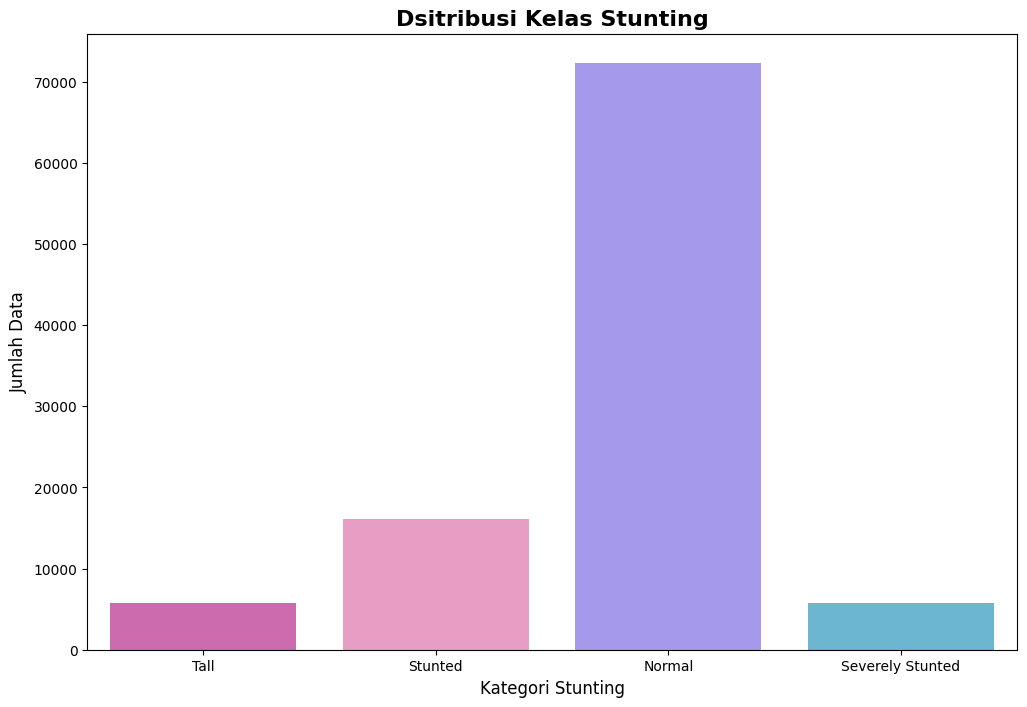

In [5]:
custom_palette = ['#DC5CB5', '#F490C5', '#9B8BFA', '#5CBEE3']  

plt.figure(figsize=(12,8))
sns.countplot(x='Stunting', data=df, palette=custom_palette)
plt.title('Dsitribusi Kelas Stunting', fontsize=16, fontweight='bold')
plt.xlabel('Kategori Stunting', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.show()

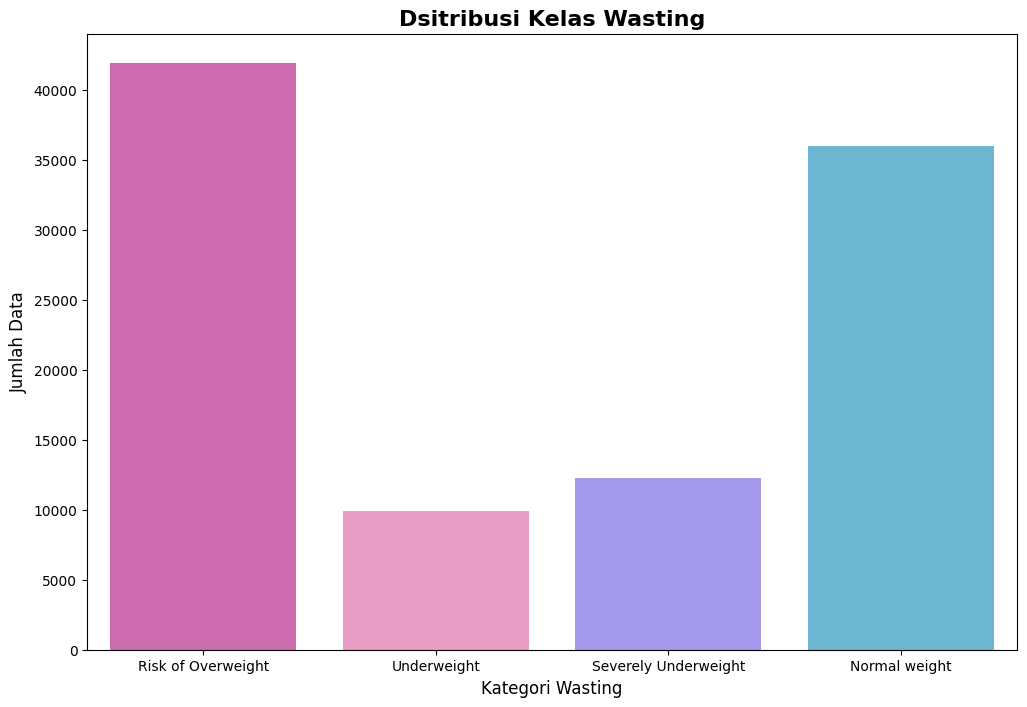

In [6]:
custom_palette = ['#DC5CB5', '#F490C5', '#9B8BFA', '#5CBEE3']  

plt.figure(figsize=(12,8))
sns.countplot(x='Wasting', data=df, palette=custom_palette)
plt.title('Dsitribusi Kelas Wasting', fontsize=16, fontweight='bold')
plt.xlabel('Kategori Wasting', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.show()

# Data Preprocessing

### Membersihkan dan mempersiapkan data untuk analisis.

- Mengonversi data kategorikal ke numerik menggunakan LabelEncoder.
- Normalisasi data numerik menggunakan StandardScaler untuk memastikan semua fitur berada pada skala yang sama.
- Menampilkan nilai rata-rata (mean) dan skala (std) setelah normalisasi.

In [7]:
label_encoder_stunting = LabelEncoder()
df['Stunting'] = label_encoder_stunting.fit_transform(df['Stunting'])

label_encoder_wasting = LabelEncoder()
df['Wasting'] = label_encoder_wasting.fit_transform(df['Wasting'])

label_encoder_gender = LabelEncoder()
df['Jenis Kelamin'] = label_encoder_gender.fit_transform(df['Jenis Kelamin'])

In [8]:
X = df[['Jenis Kelamin', 'Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)']].values
y_stunting = df['Stunting'].values
y_wasting = df['Wasting'].values

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Mendapatkan mean dan scale
mean = scaler.mean_
std = scaler.scale_

print("Mean:", mean)
print("Std (scale):", std)

Mean: [ 0.49821  11.99258  73.132657  9.259256]
Std (scale): [ 0.4999968   7.19963506 11.36078884  3.30076366]


# Train-Test Split

### Membagi data menjadi data latih dan data uji.

- Membagi data dalam proporsi 80:20 menggunakan `train_test_split`, Ini penting untuk mengukur performa model pada data yang belum pernah.
- Memastikan data latih dan data uji memiliki proporsi yang pas untuk setiap kelas.

In [11]:
X_train, X_test, y_train_stunting, y_test_stunting, y_train_wasting, y_test_wasting = train_test_split(
    X_scaled, y_stunting, y_wasting, test_size=0.2, random_state=42
)

X_train, X_test, y_train_stunting, y_test_stunting, y_train_wasting, y_test_wasting

(array([[ 1.00358643e+00, -1.38792868e+00, -1.86894214e+00,
         -1.62364124e+00],
        [ 1.00358643e+00,  1.39926537e-01,  1.02751932e-01,
          4.36488083e-01],
        [ 1.00358643e+00,  6.95510253e-01,  1.19422544e+00,
          1.58773682e+00],
        ...,
        [-9.96426385e-01,  1.03060779e-03,  7.80521769e-01,
          2.85007985e-01],
        [-9.96426385e-01, -1.37865321e-01,  2.61191634e-01,
         -1.01772085e+00],
        [ 1.00358643e+00,  1.38998990e+00,  9.56565882e-01,
         -1.39136287e-01]]),
 array([[ 1.00358643e+00, -1.52682461e+00, -1.63128259e+00,
         -6.84464637e-01],
        [ 1.00358643e+00, -5.54553108e-01, -6.27831139e-01,
          8.90928374e-01],
        [-9.96426385e-01,  1.11219804e+00,  1.48469822e+00,
          4.97080121e-01],
        ...,
        [ 1.00358643e+00, -5.54553108e-01, -9.88721572e-01,
         -3.81504443e-01],
        [ 1.00358643e+00,  1.03060779e-03,  1.55565166e-01,
         -1.16920095e+00],
        [ 1.003

In [12]:
X_train.shape, X_test.shape, y_train_stunting.shape, y_test_stunting.shape, y_train_wasting.shape, y_test_wasting.shape

((80000, 4), (20000, 4), (80000,), (20000,), (80000,), (20000,))

# Model Training

### Membangun dan melatih model machine learning.

- **Arsitektur Model**:
  - Input layer menerima data dengan jumlah fitur tertentu.
  - Hidden layers terdiri dari beberapa lapisan dengan aktivasi ReLU.
  - Output layers menggunakan aktivasi softmax untuk klasifikasi.
- **Kompilasi Model**:
  - Optimizer: Adam
  - Loss function: `sparse_categorical_crossentropy` untuk setiap keluaran (Stunting dan Wasting).
  - Metrics: Akurasi (accuracy).
  - Menampilkan ringkasan model dengan `.summary()` untuk memvalidasi struktur.

Serta melatih model selama beberapa epoch dengan `model.fit`.

In [13]:
input_layer = layers.Input(shape=(X_train.shape[1],))

x = layers.Dense(64, activation='relu')(input_layer)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)

stunting_output = layers.Dense(len(label_encoder_stunting.classes_), activation='softmax', name='stunting_output')(x)
wasting_output = layers.Dense(len(label_encoder_wasting.classes_), activation='softmax', name='wasting_output')(x)

model = models.Model(inputs=input_layer, outputs=[stunting_output, wasting_output])

In [14]:
model.compile(optimizer='adam', 
              loss={'stunting_output': 'sparse_categorical_crossentropy', 
                    'wasting_output': 'sparse_categorical_crossentropy'},
              metrics={'stunting_output': ['accuracy'], 
                       'wasting_output': ['accuracy']})

In [15]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │        320 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      2,080 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 16)        │        528 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stunting_output     │ (None, 4)         │         68 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wasting_output      │ (None, 4)         │         68 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,064 (11.97 KB)

 Trainable params: 3,064 (11.97 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.fit(X_train, {'stunting_output': y_train_stunting, 'wasting_output': y_train_wasting},
          epochs=10, batch_size=32, validation_data=(X_test, {'stunting_output': y_test_stunting, 'wasting_output': y_test_wasting}))

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.9574 - stunting_output_accuracy: 0.7811 - wasting_output_accuracy: 0.8294 - val_loss: 0.2805 - val_stunting_output_accuracy: 0.9340 - val_wasting_output_accuracy: 0.9645
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2601 - stunting_output_accuracy: 0.9336 - wasting_output_accuracy: 0.9665 - val_loss: 0.2117 - val_stunting_output_accuracy: 0.9448 - val_wasting_output_accuracy: 0.9681
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1997 - stunting_output_accuracy: 0.9458 - wasting_output_accuracy: 0.9735 - val_loss: 0.1681 - val_stunting_output_accuracy: 0.9506 - val_wasting_output_accuracy: 0.9835
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1747 - stunting_output_accuracy: 0.9534 - wasting_output_accuracy: 0.9761 - val_loss: 0.1536 - val_stunting_output_accuracy: 0.9603 - val_wasting_output_accuracy: 0.9766
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.

# Model Evaluation

### Mengevaluasi performa model pada data uji.

- Pada tahap ini di lakukan visualisasi metrik performa seperti akurasi dan loss selama pelatihan menggunakan grafik.
- Memberikan input baru ke model yang sudah dilatih.

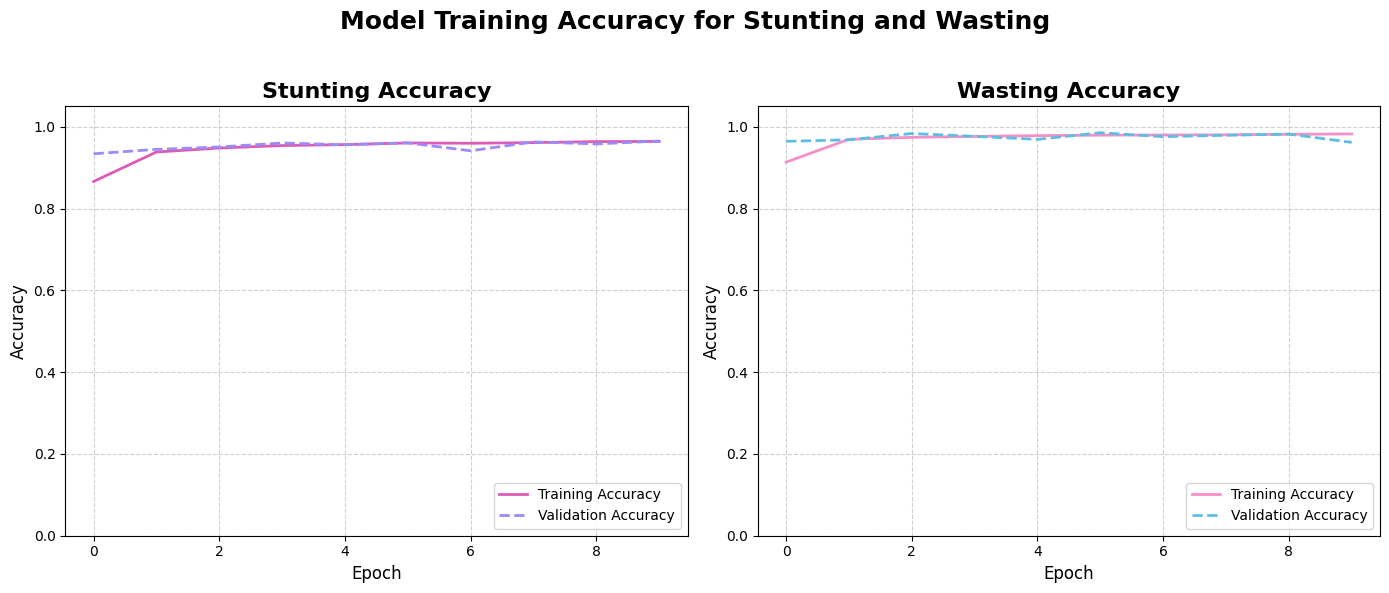

In [17]:
history = model.history.history
plt.figure(figsize=(14, 6))

# Plot 1: Stunting Accuracy
plt.subplot(1, 2, 1)
plt.plot(history['stunting_output_accuracy'], label='Training Accuracy', color='#DC5CB5', linewidth=2)
plt.plot(history['val_stunting_output_accuracy'], label='Validation Accuracy', color='#9B8BFA', linestyle='--', linewidth=2)
plt.title('Stunting Accuracy', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right', fontsize=10)
plt.ylim(0, 1.05)

# Plot 2: Wasting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['wasting_output_accuracy'], label='Training Accuracy', color='#F490C5', linewidth=2)
plt.plot(history['val_wasting_output_accuracy'], label='Validation Accuracy', color='#5CBEE3', linestyle='--', linewidth=2)
plt.title('Wasting Accuracy', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right', fontsize=10)
plt.ylim(0, 1.05)

plt.suptitle('Model Training Accuracy for Stunting and Wasting', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


In [18]:
new_data = np.array([[0, 12, 69, 9]]) #Gender, Umur(bulan), Tinggi, Berat
#Wasting = Normal, Stunting = Stunted

new_data_scaled = scaler.transform(new_data)

stunting_pred, wasting_pred = model.predict(new_data_scaled)

gender = new_data[0][0]  

if gender == 0: 
    stunting_mapping = {0: 'Normal', 1: 'Severely Stunted', 2: 'Stunted', 3: 'Tall'}
else: 
    stunting_mapping = {0: 'Normal', 1: 'Severely Stunted', 2: 'Stunted', 3: 'Tall'}

if gender == 0:
    wasting_mapping = {0: 'Normal', 1: 'Risk of Overweight', 2: 'Severely Underweight', 3: 'Underweight'}
else:  
    wasting_mapping = {0: 'Normal', 1: 'Risk of Overweight', 2: 'Severely Underweight', 3: 'Underweight'}

stunting_pred_label = stunting_mapping[np.argmax(stunting_pred)]
wasting_pred_label = wasting_mapping[np.argmax(wasting_pred)]

print(f"Prediksi Stunting: {stunting_pred_label}")
print(f"Prediksi Wasting: {wasting_pred_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediksi Stunting: Stunted
Prediksi Wasting: Normal


# Model Saving

### Menyimpan mode ke dalam bentuk h5.

Model yang telah di lakukan uji coba dengan data baru di atas, disimpan menggunakan model h5

In [19]:
model.save('/kaggle/working/model 1.h5')